# GeneReader Exploratory Data Analysis


In [1]:
# Import packages
import numpy as np
import pandas as pd
import spacy
import re
import textstat

In [2]:
# Sets option to display all text in pandas dataframes
pd.set_option('display.max_colwidth', None)

In [3]:
# Load English tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load("en_core_web_sm")

# Specify whether to load in doc or sentence aligned Wikipedia data
WikiLevel = 'doc' # Can be either 'doc' or 'sentence'
if WikiLevel == 'doc':
    FileExt = '_d.txt'
if WikiLevel == 'sentence':
    FileExt = '_s.txt'

# Load Normal and Simplified English Wikipedia datasets
NormDF = pd.read_csv('~/Documents/InsightDS/TextSimplify/'+WikiLevel+'_aligned/normal'+FileExt, 
                     sep = '\t', 
                     header =  None)
# Add column names
NormDF.columns = ['topic', 'paragraph_num', 'text']
NormDF['type'] = 'norm'

SimpDF = pd.read_csv('~/Documents/InsightDS/TextSimplify/'+WikiLevel+'_aligned/simple'+FileExt, 
                     sep = '\t', 
                     header =  None)
# Add column names
SimpDF.columns = ['topic', 'paragraph_num', 'text']
SimpDF['type'] = 'simp'

# Merge normal and simplified english wikipedia data sets
WikiDF = NormDF.append(SimpDF)
WikiDF['text'] = WikiDF['text'].apply(str) # Turn text to string
WikiDF['text_l'] = WikiDF['text'].str.lower() # Turn text to lower

# If WikiLevel at document aligned, merge sentences into paragraph and paragraphs into single file for doc
if WikiLevel == 'doc':
    WikiDF = WikiDF.groupby(['topic', 'type', 'paragraph_num'], as_index = False).agg({'text': ' '.join})
    WikiDF = WikiDF.groupby(['topic', 'type'], as_index = False).agg({'text': '\n '.join})

In [4]:
# For exploratory data analysis, get random sample of topics
RandTopics = pd.DataFrame(WikiDF['topic'].unique()).sample(1000)
RandTopics.columns = ['topic']

# Subset Wikipedia dataframe to random sample of topics
WikiDF_sub = WikiDF[WikiDF['topic'].isin(RandTopics['topic'])].reset_index()
len(WikiDF_sub.index)

2000

In [5]:
# Compute text readability score for subset
WikiDF_sub['text'] = WikiDF_sub['text'].apply(str) # Turn text to string
WikiDF_sub['fkg_score'] = WikiDF_sub['text'].apply(textstat.flesch_kincaid_grade)
WikiDF_sub['flesch_read'] = WikiDF_sub['text'].apply(textstat.flesch_reading_ease)
WikiDF_sub['fog_score'] = WikiDF_sub['text'].apply(textstat.gunning_fog)
WikiDF_sub['ari_score'] = WikiDF_sub['text'].apply(textstat.automated_readability_index)
WikiDF_sub['cli_score'] = WikiDF_sub['text'].apply(textstat.coleman_liau_index)
WikiDF_sub['lwf_score'] = WikiDF_sub['text'].apply(textstat.linsear_write_formula)
WikiDF_sub['dcr_score'] = WikiDF_sub['text'].apply(textstat.dale_chall_readability_score)
WikiDF_sub['consensus'] = WikiDF_sub['text'].apply(textstat.text_standard)
WikiDF_sub['n_sentences'] = WikiDF_sub['text'].apply(textstat.sentence_count)
WikiDF_sub['n_syllables'] = WikiDF_sub['text'].apply(textstat.syllable_count)
WikiDF_sub['n_lexicon'] = WikiDF_sub['text'].apply(textstat.lexicon_count)

type
norm    AxesSubplot(0.125,0.125;0.775x0.755)
simp    AxesSubplot(0.125,0.125;0.775x0.755)
Name: lwf_score, dtype: object

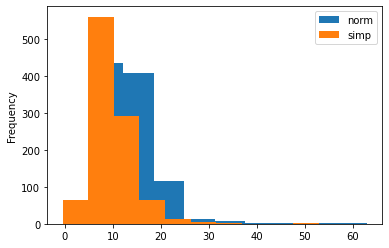

In [6]:
WikiDF_sub.groupby('type')['lwf_score'].plot(kind = 'hist', legend = True)

type
norm    AxesSubplot(0.125,0.125;0.775x0.755)
simp    AxesSubplot(0.125,0.125;0.775x0.755)
Name: fog_score, dtype: object

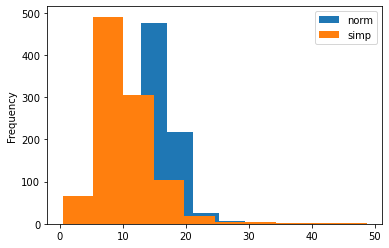

In [7]:
WikiDF_sub.groupby('type')['fog_score'].plot(kind = 'hist', legend = True)

In [8]:
WikiDF_sub['topic'].unique()

array(['1337', '1591', '1962 Formula One season', '1968',
       '1970 Bhola cyclone', '1980 Atlantic hurricane season',
       '1992 Pacific hurricane season', '1997',
       '2010 Summer Youth Olympics',
       "2010 US Open â\x80\x93 Girls' Doubles", '90 Antiope',
       'A Day in the Life', 'AIDS', 'Aach, Baden-WÃ¼rttemberg',
       'Acanthodii', 'Acapulco', 'Achterhooks', 'Acrocanthosaurus',
       'Adliswil', 'Aeschylus', 'Afrodisiac', 'Agano River',
       'Agnieszka WÅ\x82odarczyk', 'Airbus A310', 'Al Rollins', 'Al Snow',
       'Alachua, Florida', 'Alaigne', 'Alain Prost', "Albert's Lyrebird",
       'Alberto Aquilani', 'Alexandra Burke', 'Alfa Romeo 159',
       'Alfred Kinsey', 'Alicante', 'All Sports Network', 'Alphabet',
       'Ambiguity', 'Ambler, Alaska', 'Ambrines', 'Amherst, Virginia',
       'Anchor', 'Andrea Orlandi', 'Angara (rocket family)',
       'Angel Road railway station', 'Angelos Charisteas', 'Animism',
       'Anna Bligh', 'Anoye', 'Antalya', 'Antenna (bio

In [30]:
Sub2 = WikiDF_sub[WikiDF_sub['topic'] == '1992 Pacific hurricane season']

In [31]:
Sub2[['topic', 'type', 'text', 'n_sentences']]

topic  type  \
12  1992 Pacific hurricane season  norm   
13  1992 Pacific hurricane season  simp   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

<AxesSubplot:xlabel='consensus'>

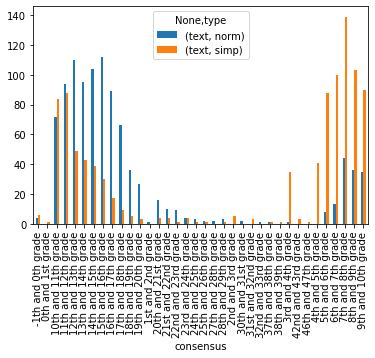

In [50]:
pd.pivot_table(WikiDF_sub, index = ['consensus'], columns = ['type'], values = ['text'], aggfunc = 'count').reset_index().plot.bar(x = 'consensus')

In [11]:
nlp(WikiDF_sub['text'][49])

Elwin `` Al '' Ira Rollins -LRB- October 9 , 1926 â `` July 27 1996 -RRB- was a professional Canadian ice hockey goaltender .
 Born in Vanguard , Saskatchewan , Rollins played in the NHL for the Toronto Maple Leafs , Chicago Black Hawks and New York Rangers . He played a big role in the Leafs 1951 Stanley Cup victory . Rollins also won the 1951 Vezina Trophy and the 1954 Hart Memorial Trophy .
 Rollins retired in 1962 and decided to become a coach . After retiring , Rollins coached the University of Calgary ice hockey team as well as clubs in Spokane , Salt Lake City , Houston , Tulsa and Phoenix . As a coach , he had a lot of success , including an Allan Cup win with the Spokane Jets in 1970 .
 His son Jerry Rollins played in the WHA which no longer is in operation .

<AxesSubplot:title={'center':'fog_score'}, xlabel='type'>

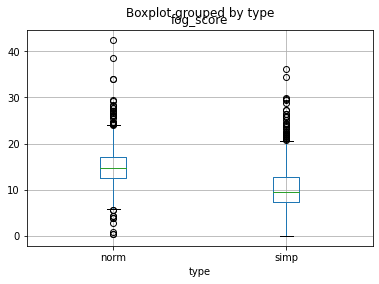

In [275]:
WikiDF_sub.boxplot(column = 'fog_score', by = 'type')